In [1]:
import pandas as pd
import numpy as np
import matplotlib as mplb
import matplotlib.pyplot as plt
# import all necessary functions and tools needed for this dataset

In [2]:
# An alternative way to provide alternative input file path:
#file_path = input('Enter file path: ')
#with open (file_path, 'r') as file:
    #print(file.read())
df = pd.read_csv('transaction_data.csv')
df
# import the data from the csv file and see what we are working with  

,TransactionID,CustID,Date,Employee,ProductID,ProductName,VendorID,ProductVendor,UnitPrice,Quantity,Subtotal,Tax(8%),OrderTotal
0,10258,1,7/17/2023,Nancy Davolio,32,Mascarpone Fabioli,14,Formaggi Fortini s.r.l.,25.6,6,153.6,12.29,165.89
1,10275,2,8/7/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,12,43.2,3.46,46.66
2,10275,2,8/7/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,6,264.0,21.12,285.12
3,10292,3,8/28/2023,Nancy Davolio,20,Sir Rodney's Marmalade,8,"Specialty Biscuits, Ltd.",64.8,20,1296.0,103.68,1399.68
4,10293,4,8/29/2023,Nancy Davolio,18,Carnarvon Tigers,7,"Pavlova, Ltd.",50.0,12,600.0,48.00,648.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,11016,20,4/10/2025,Anne Dodsworth,31,Gorgonzola Telino,14,Formaggi Fortini s.r.l.,12.5,15,187.5,15.00,202.50
1349,11016,20,4/10/2025,Anne Dodsworth,36,Inlagd Sill,17,Svensk Sjfda AB,19.0,16,304.0,24.32,328.32
1350,11058,82,4/29/2025,Anne Dodsworth,21,Sir Rodney's Scones,8,"Specialty Biscuits, Ltd.",10.0,3,30.0,2.40,32.40
1351,11058,82,4/29/2025,Anne Dodsworth,60,Camembert Pierrot,28,Gai pturage,34.0,21,714.0,57.12,771.12


In [3]:
df.describe()
# This is used to show the statistical information that can be used to gain general insight.

,TransactionID,CustID,ProductID,VendorID,UnitPrice,Quantity,Subtotal,Tax(8%),OrderTotal
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,10661.179601,38.942350,40.389505,14.318551,25.908899,12.631929,324.537568,25.962971,350.500540
std,243.094311,25.056615,22.277628,8.217175,28.613063,6.395421,403.982507,32.318600,436.301107
min,10248.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.800000,0.380000,5.180000
25%,10454.000000,17.000000,21.000000,7.000000,12.000000,7.000000,100.000000,8.000000,108.000000
50%,10656.000000,35.000000,41.000000,14.000000,18.400000,12.000000,210.000000,16.800000,226.800000
75%,10864.000000,60.000000,60.000000,21.000000,31.230000,20.000000,394.000000,31.520000,425.520000
max,11077.000000,89.000000,77.000000,29.000000,263.500000,24.000000,4216.000000,337.280000,4553.280000


Standard Deviation shows that this data set has a wide variety of values, and that the values in the dataset are more spread out. A higher standard deviation indicates greater variability and a wider distribution around the mean. Min and Max can be treated as Outliers

In [4]:
df.describe(include=object)

,Date,Employee,ProductName,ProductVendor
count,1353,1353,1353,1353
unique,450,9,77,29
top,5/6/2025,Margaret Peacock,Guaran Fantstica,Plutzer Lebensmittelgromrkte AG
freq,31,265,34,116


This shows that there are 29 Vendors, 77 products, 9 different employees, Margaret Peacock being a top employee and Guaran Fantastica being the best product and Plutzer being the top Vendor.

In [5]:
df.info()
# to review what information we have on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  1353 non-null   int64  
 1   CustID         1353 non-null   int64  
 2   Date           1353 non-null   object 
 3   Employee       1353 non-null   object 
 4   ProductID      1353 non-null   int64  
 5   ProductName    1353 non-null   object 
 6   VendorID       1353 non-null   int64  
 7   ProductVendor  1353 non-null   object 
 8   UnitPrice      1353 non-null   float64
 9   Quantity       1353 non-null   int64  
 10  Subtotal       1353 non-null   float64
 11  Tax(8%)        1353 non-null   float64
 12  OrderTotal     1353 non-null   float64
dtypes: float64(4), int64(5), object(4)
memory usage: 137.5+ KB


Overall Analysis of Data:

In [6]:
df.head(10)
#conversion of the provided data set to a DataFrame, with a sampling of the top 10 rows

,TransactionID,CustID,Date,Employee,ProductID,ProductName,VendorID,ProductVendor,UnitPrice,Quantity,Subtotal,Tax(8%),OrderTotal
0,10258,1,7/17/2023,Nancy Davolio,32,Mascarpone Fabioli,14,Formaggi Fortini s.r.l.,25.6,6,153.6,12.29,165.89
1,10275,2,8/7/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,12,43.2,3.46,46.66
2,10275,2,8/7/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,6,264.0,21.12,285.12
3,10292,3,8/28/2023,Nancy Davolio,20,Sir Rodney's Marmalade,8,"Specialty Biscuits, Ltd.",64.8,20,1296.0,103.68,1399.68
4,10293,4,8/29/2023,Nancy Davolio,18,Carnarvon Tigers,7,"Pavlova, Ltd.",50.0,12,600.0,48.00,648.00
5,10293,4,8/29/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,10,36.0,2.88,38.88
6,10293,4,8/29/2023,Nancy Davolio,63,Vegie-spread,7,"Pavlova, Ltd.",35.1,5,175.5,14.04,189.54
7,10293,4,8/29/2023,Nancy Davolio,75,Rhnbru Klosterbier,12,Plutzer Lebensmittelgromrkte AG,6.2,6,37.2,2.98,40.18
8,10304,4,9/12/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,10,440.0,35.20,475.20
9,10304,4,9/12/2023,Nancy Davolio,71,Flotemysost,15,Norske Meierier,17.2,2,34.4,2.75,37.15


Certain columns have to be removed and either put into seperate tables or removed completely for Data normalization to occur

## Normalization:

In [7]:
dfnt = df.drop(columns= ['Tax(8%)'])
dfnt
# Removed tax column due to unecessary needs and skewing of interpretation of data
# dfnt = no tax

,TransactionID,CustID,Date,Employee,ProductID,ProductName,VendorID,ProductVendor,UnitPrice,Quantity,Subtotal,OrderTotal
0,10258,1,7/17/2023,Nancy Davolio,32,Mascarpone Fabioli,14,Formaggi Fortini s.r.l.,25.6,6,153.6,165.89
1,10275,2,8/7/2023,Nancy Davolio,24,Guaran Fantstica,10,Refrescos Americanas LTDA,3.6,12,43.2,46.66
2,10275,2,8/7/2023,Nancy Davolio,59,Raclette Courdavault,28,Gai pturage,44.0,6,264.0,285.12
3,10292,3,8/28/2023,Nancy Davolio,20,Sir Rodney's Marmalade,8,"Specialty Biscuits, Ltd.",64.8,20,1296.0,1399.68
4,10293,4,8/29/2023,Nancy Davolio,18,Carnarvon Tigers,7,"Pavlova, Ltd.",50.0,12,600.0,648.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1348,11016,20,4/10/2025,Anne Dodsworth,31,Gorgonzola Telino,14,Formaggi Fortini s.r.l.,12.5,15,187.5,202.50
1349,11016,20,4/10/2025,Anne Dodsworth,36,Inlagd Sill,17,Svensk Sjfda AB,19.0,16,304.0,328.32
1350,11058,82,4/29/2025,Anne Dodsworth,21,Sir Rodney's Scones,8,"Specialty Biscuits, Ltd.",10.0,3,30.0,32.40
1351,11058,82,4/29/2025,Anne Dodsworth,60,Camembert Pierrot,28,Gai pturage,34.0,21,714.0,771.12


#### Tax column was not used in this Analysis of data.

In [8]:
dfet= dfnt.groupby(['Employee']).sum(['Quantity', 'UnitPrice', 'OrderTotal'])
dfet
# Gathered and grouped all information related to employee except Tax
# dfet = employee table

,TransactionID,CustID,ProductID,VendorID,UnitPrice,Quantity,Subtotal,OrderTotal
Employee,,,,,,,,
Andrew Fuller,1554078,6516,5673,2079,4042.43,1829,49583.21,53549.87
Anne Dodsworth,665659,2646,2334,823,2038.56,822,25215.25,27232.47
Janet Leverling,2086955,8576,7923,2807,4833.81,2552,57347.97,61935.82
Laura Callahan,1828669,6503,7084,2439,4291.63,2250,57014.73,61575.87
Margaret Peacock,2815855,10395,10476,3848,7411.25,3308,94531.50,102093.97
Michael Suyama,1257471,5074,4833,1711,2737.12,1532,34899.51,37691.47
Nancy Davolio,2364681,5253,9287,3261,5765.38,2495,69532.81,75095.44
Robert King,1075497,4398,3977,1441,2374.41,1299,29596.60,31964.33
Steven Buchanan,775711,3328,3060,964,1560.15,1004,21377.75,23087.99


In order to get insight on quantity sold and revenue generated, all irrelevant tables will be dropped.

In [9]:
dfet= dfet.drop(columns= ['CustID','VendorID','Subtotal', 'TransactionID', 'ProductID', 'UnitPrice'])
dfet
# Drops all unnecessary columns for this specific analysis.
# dfet = employee table

,Quantity,OrderTotal
Employee,,
Andrew Fuller,1829,53549.87
Anne Dodsworth,822,27232.47
Janet Leverling,2552,61935.82
Laura Callahan,2250,61575.87
Margaret Peacock,3308,102093.97
Michael Suyama,1532,37691.47
Nancy Davolio,2495,75095.44
Robert King,1299,31964.33
Steven Buchanan,1004,23087.99


### <u>Vendor Information Dataset:</u>

In [10]:
dfvi = df.groupby(['Date']).sum(['Quantity', 'OrderTotal'])
dfvi
# grouped by date
# dfvi = Vendor Information

,TransactionID,CustID,ProductID,VendorID,UnitPrice,Quantity,Subtotal,Tax(8%),OrderTotal
Date,,,,,,,,,
1/1/2024,31202,25,124,27,136.5,59,2787.6,223.01,3010.61
1/1/2025,54047,312,216,74,80.0,57,1087.0,86.96,1173.96
1/10/2024,20821,116,118,56,88.0,25,1100.0,88.00,1188.00
1/12/2025,32480,83,106,48,68.5,51,1135.5,90.84,1226.34
1/13/2024,10412,71,14,6,18.6,20,372.0,29.76,401.76
...,...,...,...,...,...,...,...,...,...
9/5/2024,21318,140,71,33,30.9,44,691.6,55.33,746.93
9/6/2023,20598,96,89,15,19.3,35,349.5,27.96,377.46
9/8/2024,10660,18,20,8,81.0,21,1701.0,136.08,1837.08


In [11]:
dfvif = df.groupby(['VendorID']).sum(['Quantity'])
dfvif = dfvif.drop(columns=['TransactionID','ProductID','UnitPrice', 'Subtotal','Tax(8%)',"CustID"])
dfvif
# remove all unnecessary data not needed for vendor Information dataset and see what how much each vendor sold.
# dfvif = vendor information final

,Quantity,OrderTotal
VendorID,,
1,804,14466.38
2,595,12390.34
3,396,13196.52
4,572,17712.22
5,438,11269.58
6,573,7224.23
7,1150,39040.42
8,1004,21942.87
9,227,3435.05


### <u>Dataset for employee sales</u>

In [12]:
dfes= dfnt.groupby(['VendorID','ProductVendor','ProductID', 'ProductName']).sum(['Quantity', 'UnitPrice', 'OrderTotal'])
dfes
# Sales dataset has been sorted according to Vendor and Product

TransactionID  \
VendorID ProductVendor              ProductID ProductName                                   
1        Exotic Liquids             1         Chai                                 277515   
                                    2         Chang                                312283   
                                    3         Aniseed Syrup                         64361   
2        New Orleans Cajun Delights 4         Chef Anton's Cajun Seasoning         127246   
                                    5         Chef Anton's Gumbo Mix                52853   
...                                                                                   ...   
27       Escargots Nouveaux         58        Escargots de Bourgogne                74941   
28       Gai pturage                59        Raclette Courdavault                 286295   
                                    60        Camembert Pierrot                    288805   
29       Forts d'rables             61        Sirop d'rable                        172597   
                                    62        Tarte au sucre                       330347   

                                                                            CustID  \
VendorID ProductVendor              ProductID ProductName                            
1        Exotic Liquids             1         Chai                            1164   
                                    2         Chang                            965   
                                    3         Aniseed Syrup                    201   
2        New Orleans Cajun Delights 4         Chef Anton's Cajun Seasoning     450   
                                    5         Chef Anton's Gumbo Mix           207   
...                                                                            ...   
27       Escargots Nouveaux         58        Escargots de Bourgogne           246   
28       Gai pturage                59        Raclette Courdavault            1119   
                                    60        Camembert Pierrot               1070   
29       Forts d'rables             61        Sirop d'rable                    739   
                                    62        Tarte au sucre                  1225   

                                                                            UnitPrice  \
VendorID ProductVendor              ProductID ProductName                               
1        Exotic Liquids             1         Chai                             439.20   
                                    2         Chang                            532.00   
                                    3         Aniseed Syrup                     58.00   
2        New Orleans Cajun Delights 4         Chef Anton's Cajun Seasoning     242.00   
                                    5         Chef Anton's Gumbo Mix            98.05   
...                                                                               ...   
27       Escargots Nouveaux         58        Escargots de Bourgogne            90.10   
28       Gai pturage                59        Raclette Courdavault            1375.00   
                                    60        Camembert Pierrot                870.40   
29       Forts d'rables             61        Sirop d'rable                    450.30   
                                    62        Tarte au sucre                  1459.00   

                                                                            Quantity  \
VendorID ProductVendor              ProductID ProductName                              
1        Exotic Liquids             1         Chai                               313   
                                    2         Chang                              407   
                                    3         Aniseed Syrup                       84   
2        New Orleans Cajun Delights 4         Chef Anton's Cajun Seasoning       163   
                                    5         Chef Anton's Gu

In [13]:
dfes= dfes.drop(columns= ['TransactionID', 'CustID', 'UnitPrice'])
dfes
#Dropped other irrelevant columns not needed for a Sales employee dataset

Quantity  \
VendorID ProductVendor              ProductID ProductName                              
1        Exotic Liquids             1         Chai                               313   
                                    2         Chang                              407   
                                    3         Aniseed Syrup                       84   
2        New Orleans Cajun Delights 4         Chef Anton's Cajun Seasoning       163   
                                    5         Chef Anton's Gumbo Mix              71   
...                                                                              ...   
27       Escargots Nouveaux         58        Escargots de Bourgogne              95   
28       Gai pturage                59        Raclette Courdavault               301   
                                    60        Camembert Pierrot                  373   
29       Forts d'rables             61        Sirop d'rable                      187   
                                    62        Tarte au sucre                     372   

                                                                            Subtotal  \
VendorID ProductVendor              ProductID ProductName                              
1        Exotic Liquids             1         Chai                           5169.60   
                                    2         Chang                          7425.20   
                                    3         Aniseed Syrup                   800.00   
2        New Orleans Cajun Delights 4         Chef Anton's Cajun Seasoning   3198.80   
                                    5         Chef Anton's Gumbo Mix         1376.65   
...                                                                              ...   
27       Escargots Nouveaux         58        Escargots de Bourgogne         1219.00   
28       Gai pturage                59        Raclette Courdavault          15257.00   
                                    60        Camembert Pierrot             11934.00   
29       Forts d'rables             61        Sirop d'rable                  5238.30   
                                    62        Tarte au sucre                17478.30   

                                                                            OrderTotal  
VendorID ProductVendor              ProductID ProductName                               
1        Exotic Liquids             1         Chai                             5583.17  
                                    2         Chang                            8019.21  
                                    3         Aniseed Syrup                     864.00  
2        New Orleans Cajun Delights 4         Chef Anton's Cajun Seasoning     3454.70  
                                    5         Chef Anton's Gumbo Mix           1486.78  
...                                                                                ...  
27       Escargots Nouveaux         58        Escargots de Bourgogne           1316.52  
28       Gai pturage                59        Raclette Courdavault            16477.56  
                                    60        Camembert Pierrot               12888.73  
29       Forts d'rables             61        Sirop d'rable                    5657.36  
                                    62        Tarte au sucre                  18876.56  

[77 rows x 3 columns]

<u>Most Products along with Highest revenue:<u>

In [14]:
rank_p = dfes.rank(ascending=False, method = 'min')
rank_p
#rank the vendor:

Quantity  \
VendorID ProductVendor              ProductID ProductName                              
1        Exotic Liquids             1         Chai                              19.0   
                                    2         Chang                              4.0   
                                    3         Aniseed Syrup                     69.0   
2        New Orleans Cajun Delights 4         Chef Anton's Cajun Seasoning      51.0   
                                    5         Chef Anton's Gumbo Mix            71.0   
...                                                                              ...   
27       Escargots Nouveaux         58        Escargots de Bourgogne            66.0   
28       Gai pturage                59        Raclette Courdavault              23.0   
                                    60        Camembert Pierrot                  6.0   
29       Forts d'rables             61        Sirop d'rable                     48.0   
                                    62        Tarte au sucre                     7.0   

                                                                            Subtotal  \
VendorID ProductVendor              ProductID ProductName                              
1        Exotic Liquids             1         Chai                              28.0   
                                    2         Chang                             16.0   
                                    3         Aniseed Syrup                     74.0   
2        New Orleans Cajun Delights 4         Chef Anton's Cajun Seasoning      47.0   
                                    5         Chef Anton's Gumbo Mix            64.0   
...                                                                              ...   
27       Escargots Nouveaux         58        Escargots de Bourgogne            67.0   
28       Gai pturage                59        Raclette Courdavault               6.0   
                                    60        Camembert Pierrot                 10.0   
29       Forts d'rables             61        Sirop d'rable                     27.0   
                                    62        Tarte au sucre                     3.0   

                                                                            OrderTotal  
VendorID ProductVendor              ProductID ProductName                               
1        Exotic Liquids             1         Chai                                28.0  
                                    2         Chang                               16.0  
                                    3         Aniseed Syrup                       74.0  
2        New Orleans Cajun Delights 4         Chef Anton's Cajun Seasoning        47.0  
                                    5         Chef Anton's Gumbo Mix              64.0  
...                                                                                ...  
27       Escargots Nouveaux         58        Escargots de Bourgogne              67.0  
28       Gai pturage                59        Raclette Courdavault                 6.0  
                                    60        Camembert Pierrot                   10.0  
29       Forts d'rables             61        Sirop d'rable                       27.0  
                                    62        Tarte au sucre                       3.0  

[77 rows x 3 columns]

In [15]:
rank_p.sort_values('OrderTotal')

# sort product rank to find the highest earning one:

,,,,Quantity,Subtotal,OrderTotal
VendorID,ProductVendor,ProductID,ProductName,,,
12,Plutzer Lebensmittelgromrkte AG,29,Thringer Rostbratwurst,14.0,1.0,1.0
18,Aux joyeux ecclsiastiques,38,Cte de Blaye,57.0,2.0,2.0
29,Forts d'rables,62,Tarte au sucre,7.0,3.0,3.0
24,"G'day, Mate",51,Manjimup Dried Apples,16.0,4.0,4.0
26,Pasta Buttini s.r.l.,56,Gnocchi di nonna Alice,1.0,5.0,5.0
...,...,...,...,...,...,...
22,Zaanse Snoepfabriek,48,Chocolade,72.0,73.0,73.0
1,Exotic Liquids,3,Aniseed Syrup,69.0,74.0,74.0
15,Norske Meierier,33,Geitost,26.0,75.0,75.0


Suprisingly,Gnocchi di nonna Alice ranks in first in terms of amount, yet Thringer Rostbratwurst had the highest order total. Gnocchi di nonna Alice only comes in 5th

In [16]:
dfes.sort_values('OrderTotal', ascending=False)
#Find the most expensive product:


,,,,Quantity,Subtotal,OrderTotal
VendorID,ProductVendor,ProductID,ProductName,,,
12,Plutzer Lebensmittelgromrkte AG,29,Thringer Rostbratwurst,324,36984.42,39943.16
18,Aux joyeux ecclsiastiques,38,Cte de Blaye,129,31356.50,33865.02
29,Forts d'rables,62,Tarte au sucre,372,17478.30,18876.56
24,"G'day, Mate",51,Manjimup Dried Apples,320,16313.40,17618.48
26,Pasta Buttini s.r.l.,56,Gnocchi di nonna Alice,454,16112.00,17400.96
...,...,...,...,...,...,...
22,Zaanse Snoepfabriek,48,Chocolade,68,828.75,895.05
1,Exotic Liquids,3,Aniseed Syrup,84,800.00,864.00
15,Norske Meierier,33,Geitost,286,663.00,716.04


This shows that Cte de Blaye is the ***highest priced***, even if it only brings in <u>2nd highest</u> revenue. Doubled check with the following: (31,356 / 129) > (39,984 / 324)

In [17]:
dfet.rank(ascending=False)
# Shows where employee ranks in terms of amount sold and order total

,Quantity,OrderTotal
Employee,,
Andrew Fuller,5.0,5.0
Anne Dodsworth,9.0,8.0
Janet Leverling,2.0,3.0
Laura Callahan,4.0,4.0
Margaret Peacock,1.0,1.0
Michael Suyama,6.0,6.0
Nancy Davolio,3.0,2.0
Robert King,7.0,7.0
Steven Buchanan,8.0,9.0


This indeed shows that Margaret is the top employee with the most items sold and most money brought in. Janet Leverling and Nancy Davalio closely follow in 2nd and 3rd respectively and are in switched positions when it comes to Total money bought in.

In [18]:
rank_p.sort_values('Quantity')

#To show most popular product: Sort by Quantity:

,,,,Quantity,Subtotal,OrderTotal
VendorID,ProductVendor,ProductID,ProductName,,,
26,Pasta Buttini s.r.l.,56,Gnocchi di nonna Alice,1.0,5.0,5.0
19,New England Seafood Cannery,41,Jack's New England Clam Chowder,2.0,41.0,41.0
10,Refrescos Americanas LTDA,24,Guaran Fantstica,3.0,60.0,60.0
1,Exotic Liquids,2,Chang,4.0,16.0,16.0
4,Tokyo Traders,10,Ikura,5.0,12.0,12.0
...,...,...,...,...,...,...
6,Mayumi's,15,Genen Shouyu,73.0,76.0,76.0
4,Tokyo Traders,9,Mishi Kobe Niku,74.0,40.0,40.0
2,New Orleans Cajun Delights,66,Louisiana Hot Spiced Okra,75.0,77.0,77.0


Majority of the popular/most sold products generally fall towards the cheaper end.

In [19]:
dfes.sort_values('Quantity', ascending=False)

,,,,Quantity,Subtotal,OrderTotal
VendorID,ProductVendor,ProductID,ProductName,,,
26,Pasta Buttini s.r.l.,56,Gnocchi di nonna Alice,454,16112.0,17400.96
19,New England Seafood Cannery,41,Jack's New England Clam Chowder,431,3946.6,4262.33
10,Refrescos Americanas LTDA,24,Guaran Fantstica,429,1818.0,1963.45
1,Exotic Liquids,2,Chang,407,7425.2,8019.21
4,Tokyo Traders,10,Ikura,381,11135.2,12026.02
...,...,...,...,...,...,...
6,Mayumi's,15,Genen Shouyu,47,651.0,703.08
4,Tokyo Traders,9,Mishi Kobe Niku,45,3977.0,4295.16
2,New Orleans Cajun Delights,66,Louisiana Hot Spiced Okra,39,629.0,679.32


In [20]:
vendor_ranking=dfes.groupby(['VendorID','ProductVendor']).sum(['OrderTotal','Quantity'])
vendor_ranking

# To find out which vendor sold the most, groupby parameter will be used

,,Quantity,Subtotal,OrderTotal
VendorID,ProductVendor,,,
1,Exotic Liquids,804,13394.80,14466.38
2,New Orleans Cajun Delights,595,11472.55,12390.34
3,Grandma Kelly's Homestead,396,12219.00,13196.52
4,Tokyo Traders,572,16400.20,17712.22
5,Cooperativa de Quesos 'Las Cabras',438,10434.80,11269.58
6,Mayumi's,573,6689.10,7224.23
7,"Pavlova, Ltd.",1150,36148.55,39040.42
8,"Specialty Biscuits, Ltd.",1004,20317.50,21942.87
9,PB Knckebrd AB,227,3180.60,3435.05


In [21]:
vendor_ranking1 = vendor_ranking.sort_values('OrderTotal', ascending=False) 
# Now to order by Order Total to see which Vendor sold the most.
vendor_ranking1

,,Quantity,Subtotal,OrderTotal
VendorID,ProductVendor,,,
12,Plutzer Lebensmittelgromrkte AG,1436,61810.37,66755.17
7,"Pavlova, Ltd.",1150,36148.55,39040.42
18,Aux joyeux ecclsiastiques,373,35474.90,38312.89
28,Gai pturage,674,27191.00,29366.29
24,"G'day, Mate",828,25071.60,27077.33
29,Forts d'rables,559,22716.60,24533.92
26,Pasta Buttini s.r.l.,690,20448.80,22084.71
8,"Specialty Biscuits, Ltd.",1004,20317.50,21942.87
20,Leka Trading,744,18829.20,20335.55


In [22]:
vendor_ranking.rank(ascending=False).sort_values('OrderTotal')

# Now we actually rank the vendor, so that we don't have to determine who got the most by comparing large numbers:

,,Quantity,Subtotal,OrderTotal
VendorID,ProductVendor,,,
12,Plutzer Lebensmittelgromrkte AG,1.0,1.0,1.0
7,"Pavlova, Ltd.",2.0,2.0,2.0
18,Aux joyeux ecclsiastiques,23.0,3.0,3.0
28,Gai pturage,11.0,4.0,4.0
24,"G'day, Mate",5.0,5.0,5.0
29,Forts d'rables,15.0,6.0,6.0
26,Pasta Buttini s.r.l.,9.0,7.0,7.0
8,"Specialty Biscuits, Ltd.",3.0,8.0,8.0
20,Leka Trading,8.0,9.0,9.0


In [23]:
vendor_ranking.sort_values('Quantity' , ascending=False)

vendor_ranking.rank(ascending=False).sort_values('Quantity')

#Sort by the quantity and then order it


,,Quantity,Subtotal,OrderTotal
VendorID,ProductVendor,,,
12,Plutzer Lebensmittelgromrkte AG,1.0,1.0,1.0
7,"Pavlova, Ltd.",2.0,2.0,2.0
8,"Specialty Biscuits, Ltd.",3.0,8.0,8.0
15,Norske Meierier,4.0,12.0,12.0
24,"G'day, Mate",5.0,5.0,5.0
14,Formaggi Fortini s.r.l.,6.0,10.0,10.0
1,Exotic Liquids,7.0,13.0,13.0
20,Leka Trading,8.0,9.0,9.0
26,Pasta Buttini s.r.l.,9.0,7.0,7.0


# <u>Data Visualization:<u/>

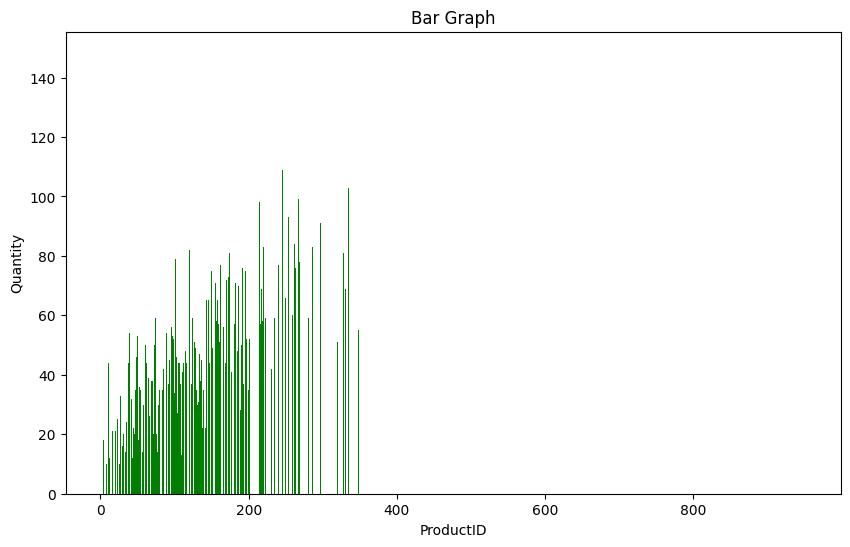

In [70]:
categories = dfvi['ProductID']
values = dfvi['Quantity']

# Set up the figure with a specific size
plt.figure(figsize=(10, 6))

# Create a line chart with custom styles
plt.bar(categories, values, color='green', linestyle='--')

# Add labels and title
plt.xlabel("ProductID")
plt.ylabel("Quantity")
plt.title("Bar Graph")

# Show the plot
plt.show()

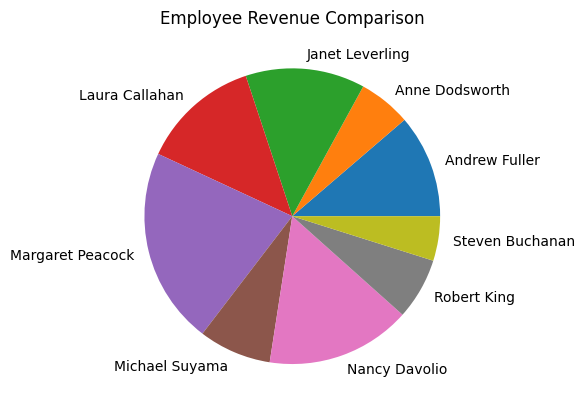

In [57]:
# Pie chart for the employees to see the total orders in comparison to the other employees
dfet['OrderTotal'].plot(kind='pie')
# display plot result
plt.title('Employee Revenue Comparison')
plt.ylabel('')
plt.show()

In [60]:
print(dfvi.columns)

Index(['TransactionID', 'CustID', 'ProductID', 'VendorID', 'UnitPrice',
       'Quantity', 'Subtotal', 'Tax(8%)', 'OrderTotal'],
      dtype='object')
